In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import LearningCurveDisplay, learning_curve
import shap

In [6]:
# extended_soil.to_csv('run.csv', index=False)
print('Training...')
soil_ml = pd.read_csv('ml_soil.csv')

# 0.65
# X = extended_soil.drop(['POINT_ID',  'POINT_ID_1', 'POINT_ID_2', 'POINT_ID_3', 'POINT_ID_4', 'CaCO3_og', 'NN', 'SURVEY_YEAR_og', 'SURVEY_YEAR_og', 'LC1_og', 'LU1_og', 'Elevation_og', 'LONG_og', 'LAT_og'], axis=1)
# X = extended_soil.drop(['POINT_ID',  'POINT_ID_1', 'POINT_ID_2', 'POINT_ID_3', 'POINT_ID_4', 'CaCO3_og', 'NN' ,'LONG_1','LAT_1','CaCO3_1','LONG_2','LAT_2','CaCO3_2','LONG_3','LAT_3','CaCO3_3','LONG_4','LAT_4','CaCO3_4', 'SURVEY_YEAR_og', 'LC1_og', 'LU1_og', 'Elevation_og', 'LONG_og', 'LAT_og'], axis=1)
X = soil_ml.drop(['POINT_ID',  'POINT_ID_1', 'POINT_ID_2', 'POINT_ID_3', 'POINT_ID_4', 'CaCO3_og', 'pH_CaCl2_og', 'NN', 'NN_DIST', 'SURVEY_YEAR_og', 'SURVEY_YEAR_og', 'LONG_og', 'LAT_og'], axis=1)
y = soil_ml['CaCO3_og']

X['LONG_1'] = X['LONG_1'] - X['LONG']
X['LAT_1'] = X['LAT_1'] - X['LAT']

X['LONG_2'] = X['LONG_2'] - X['LONG']
X['LAT_2'] = X['LAT_2'] - X['LAT']

X['LONG_3'] = X['LONG_3'] - X['LONG']
X['LAT_3'] = X['LAT_3'] - X['LAT']

X['LONG_4'] = X['LONG_4'] - X['LONG']
X['LAT_4'] = X['LAT_4'] - X['LAT']


# X = X[['CaCO3_1', 'LONG_1', 'LAT_1', 'DIST_1',
#        'CaCO3_2', 'LONG_2', 'LAT_2', 'DIST_2',
#        'CaCO3_3', 'LONG_3', 'LAT_3', 'DIST_3',
#        'CaCO3_4', 'LONG_4', 'LAT_4', 'DIST_4',
#        'pH_H2O_og', 'pH_CaCl2_og', 'OC_og', 'N_og', 'P_og', 'K_og', 'LONG', 'LAT']]

# X = X[['CaCO3_1', 'DIST_1',
#        'CaCO3_2', 'DIST_2',
#        'CaCO3_3', 'DIST_3',
#        'CaCO3_4', 'DIST_4',
#        'pH_H2O_og', 'pH_CaCl2_og', 'OC_og', 'N_og', 'P_og', 'K_og', 'LONG', 'LAT']]

# X = X[['CaCO3_1', 'LONG_1', 'LAT_1',
#        'CaCO3_2', 'LONG_2', 'LAT_2',
#        'CaCO3_3', 'LONG_3', 'LAT_3',
#        'CaCO3_4', 'LONG_4', 'LAT_4',
#        'pH_H2O_og', 'OC_og', 'N_og', 'P_og', 'K_og', 'LONG', 'LAT']]

X = X[['CaCO3_1',
       'CaCO3_2',
       'CaCO3_3',
       'CaCO3_4',
       'pH_H2O_og', 'OC_og', 'N_og', 'P_og', 'K_og', 'LONG', 'LAT']]

# X = X[['pH_H2O_og', 'OC_og', 'N_og', 'P_og', 'K_og', 'LONG', 'LAT']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Training...


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Training time: 74.78247046470642 s
R2-score: 0.7019253075023892


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will 

<Axes: >

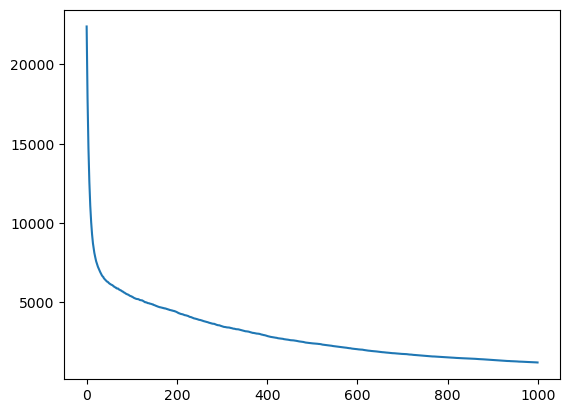

In [7]:
import time

start = time.time()
regr = GradientBoostingRegressor(n_estimators=1000, min_samples_leaf=20, max_depth=6)
regr.fit(X_train, y_train)
end = time.time()
print(f'Training time: {end - start} s')

print(f'R2-score: {regr.score(X_test, y_test)}')

sns.lineplot(regr.train_score_)

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: >

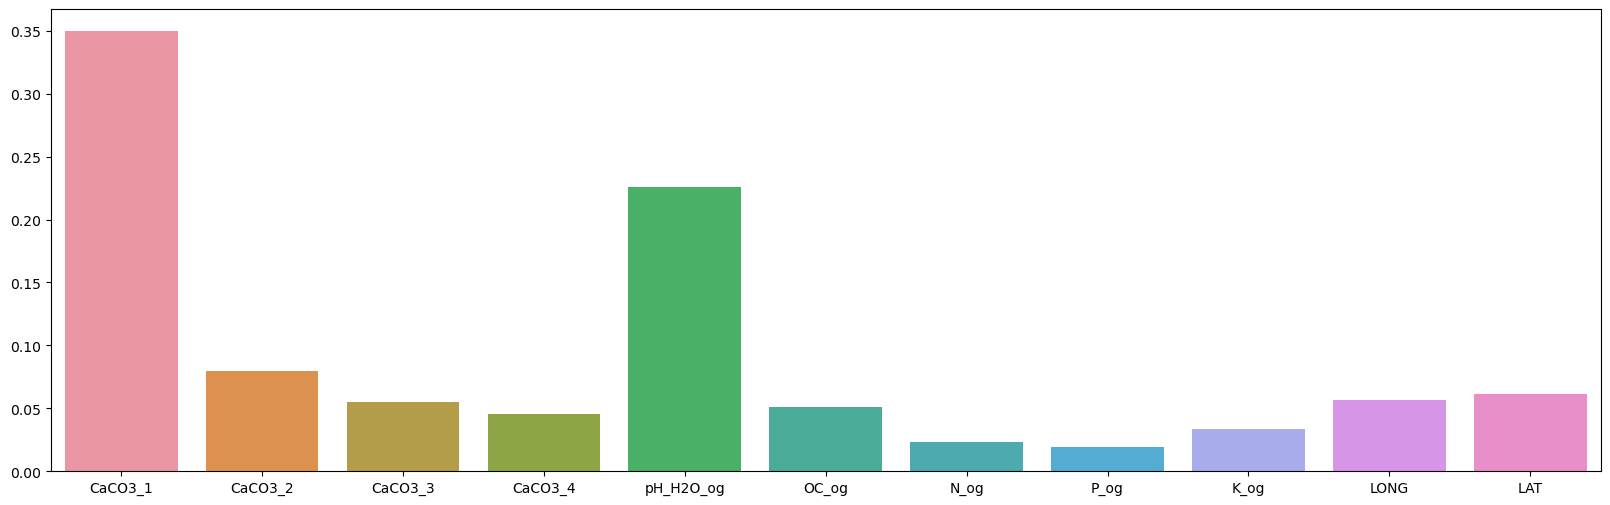

In [8]:
plt.figure(figsize=(20, 6))
sns.barplot(x=X.columns.values, y=regr.feature_importances_)
# Here is the average feature importance of the model visible
# The model weighs the CaCO3 of the nearest point the highest, followed by pH H2O, the other NN and LONG, LAT

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecat

<Axes: >

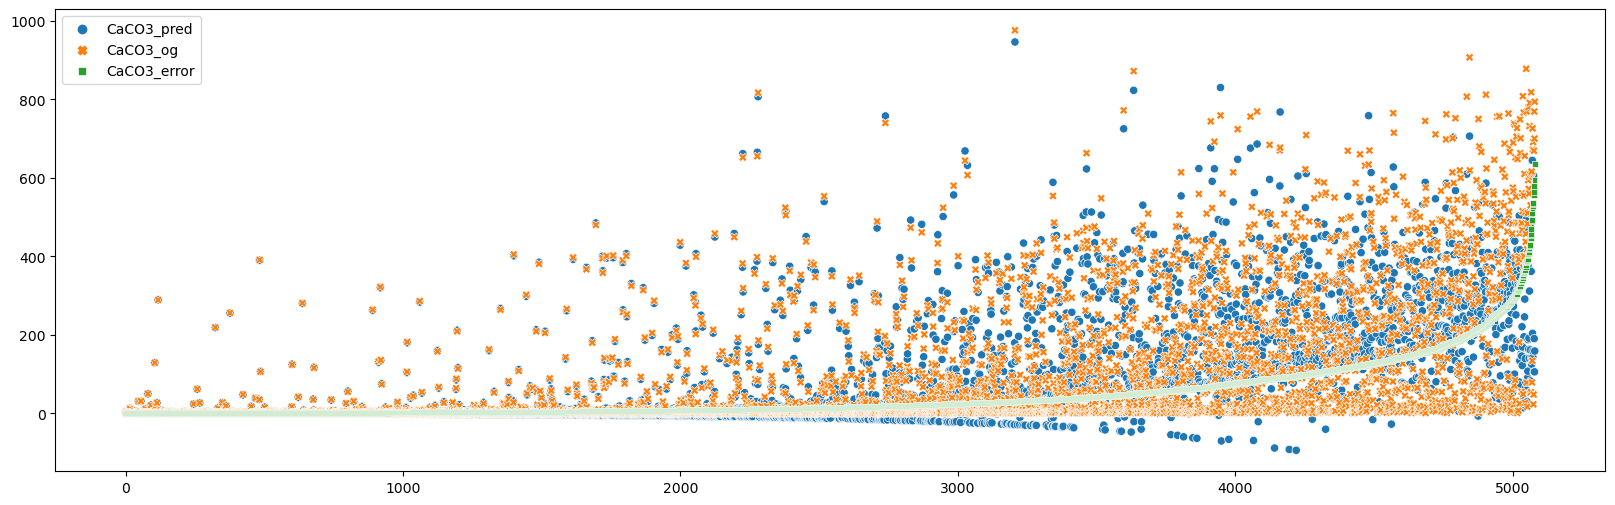

In [9]:
y_pred = pd.Series(regr.predict(X_test), name='CaCO3_pred')

error_df = pd.concat([y_pred, y_test.reset_index(drop=True)], axis=1)
error_df['CaCO3_error'] = (error_df['CaCO3_og'] - error_df['CaCO3_pred']).abs()
error_df = error_df.sort_values('CaCO3_error', ascending=True, ignore_index=True)

# This plots the CaCO3 predictions in ascending order by error abs(prediction - true value)
# It looks the error increases with the increase in the true value
plt.figure(figsize=(20, 6))
sns.scatterplot(error_df)

<Axes: >

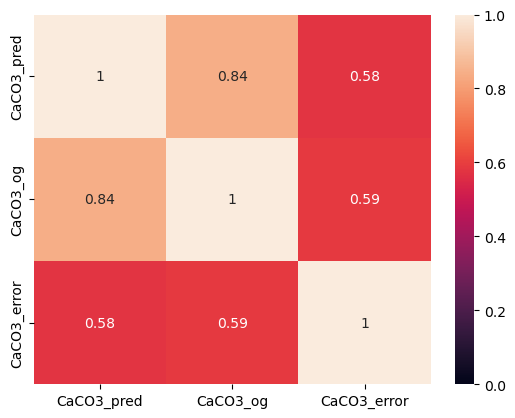

In [213]:
# This linear correlatin matrix shows 0.59 between error and higher true value of CaCO3
sns.heatmap(error_df.corr(), vmin=0, vmax=1, annot=True)

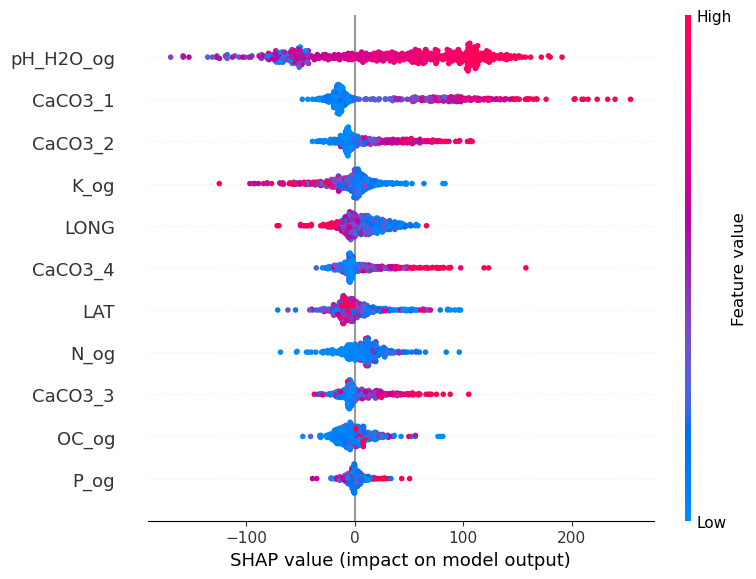

In [10]:
# With shap it is possible to get some insight how the model behaves
# The x-axis shows if the model predicts higher or lower
# Blue means low feature value and red high feature value
# If distribution is shown by the y "width" of the points if it gets thicker then more samples are in this region
explainer = shap.TreeExplainer(regr)
X_test_summary = pd.DataFrame(shap.kmeans(X_test, 500).data, columns=X_test.columns) # To reduce computing time, the test sample size is reduced to 500 samples
shap_values = explainer.shap_values(X_test_summary)
shap.summary_plot(shap_values, X_test_summary)

The figure layout has changed to tight
The figure layout has changed to tight


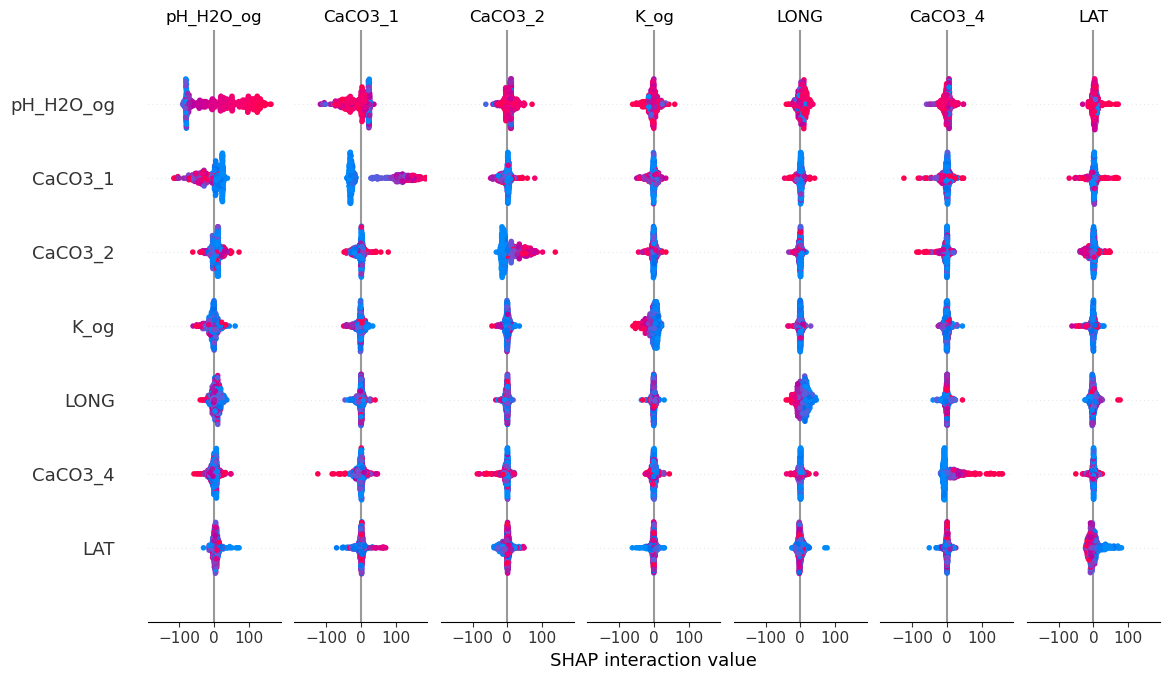

In [11]:
shap_interaction_values = explainer.shap_interaction_values(X_test_summary)
shap.summary_plot(shap_interaction_values, X_test_summary)

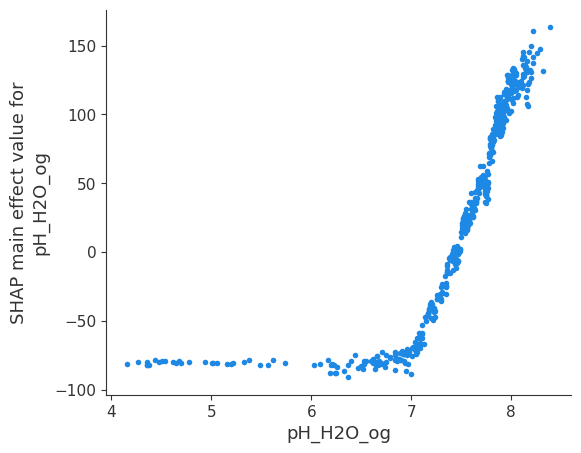

In [19]:
shap.dependence_plot(('pH_H2O_og', 'pH_H2O_og'), shap_interaction_values, X_test_summary)
# pH_H2O will push the prediction down until 7 and then linear push the prediction up

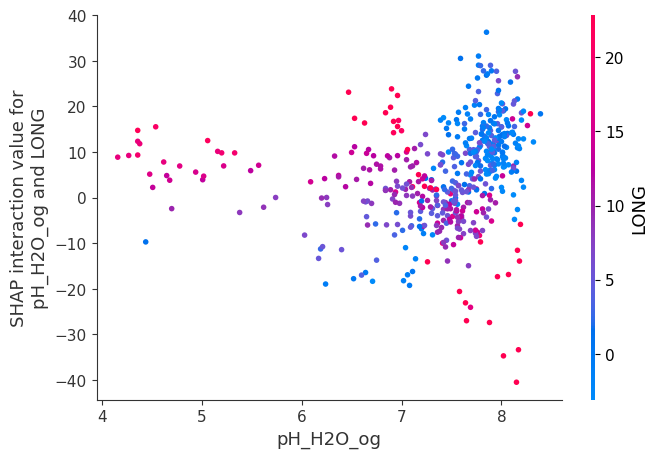

In [20]:
shap.dependence_plot(('pH_H2O_og', 'LONG'), shap_interaction_values, X_test_summary)
# Low Longitude is distributed more together with similar pH H20
# High Longiture samples are more distributed along pH H20. 
# The higher LONG and higher pH H20 increase CaCO3 prediction.
# The lower LONG and higher pH H20 decrease CaCO3 prediction.

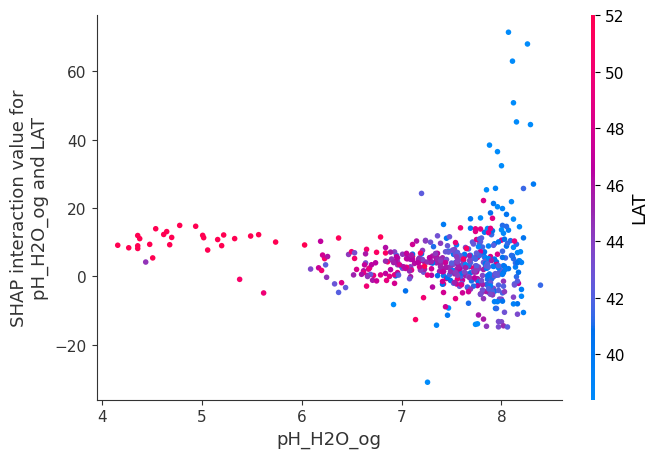

In [21]:
shap.dependence_plot(('pH_H2O_og', 'LAT'), shap_interaction_values, X_test_summary)
# Low LAT is distributed more together with higher pH H20.
# High LAT is distributed more distributed along pH H20. 
# LAT and pH H20 do increase CaCO3 prediction a little with some outliers with low LAT and high pH H20 increasing CaCO3 prediction.

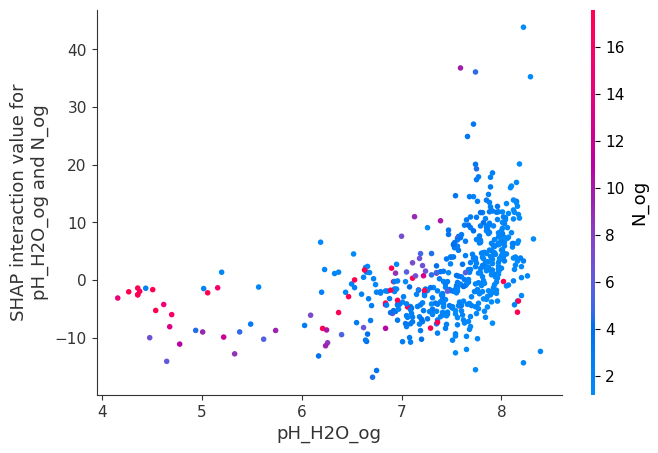

In [22]:
shap.dependence_plot(('pH_H2O_og', 'N_og'), shap_interaction_values, X_test_summary)
# Low N is distributed more together with higher pH H20.
# High N is distributed more distributed along pH H20. But visible less samples inc comparison to low N.
# The impact is in average 0.

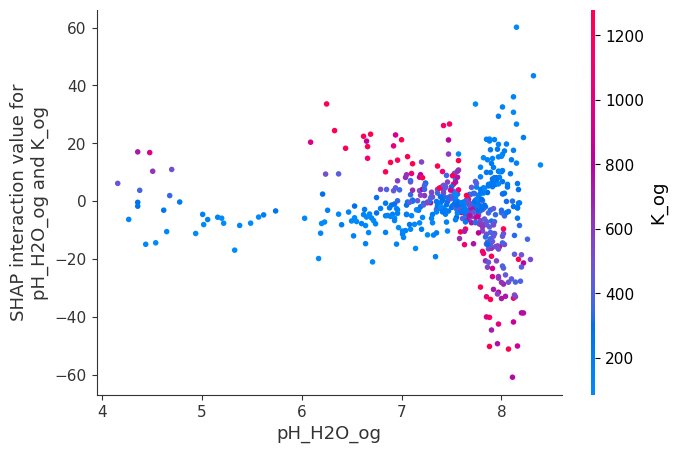

In [23]:
shap.dependence_plot(('pH_H2O_og', 'K_og'), shap_interaction_values, X_test_summary)
# Here it looks like two curves going opposite direction.
# Blue (low K) lower prediction and increases exponentially at around 8.
# Red (high K) starts higher than Blue but decreases exponentially at around 8.

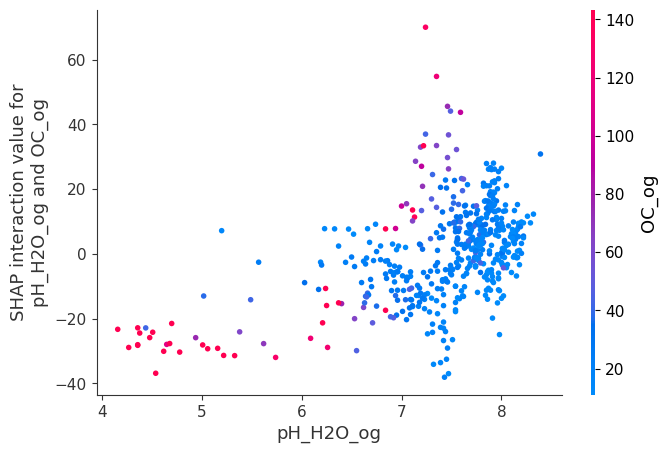

In [24]:
shap.dependence_plot(('pH_H2O_og', 'OC_og'), shap_interaction_values, X_test_summary)
# Blue is closer together with low OC values and high pH.
# Red (high OC) shows a curve biginning low with low pH and increasing from 6 exponentially.

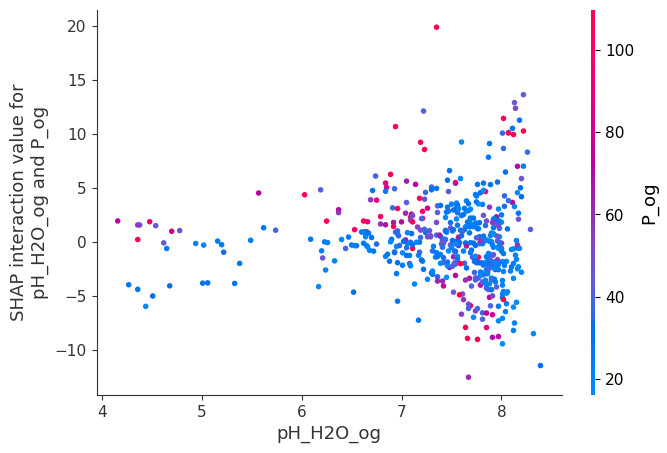

In [25]:
shap.dependence_plot(('pH_H2O_og', 'P_og'), shap_interaction_values, X_test_summary)
# Hmmm difficult to say. Looks again like before two opposite exponential (same as K) curves but less clear.

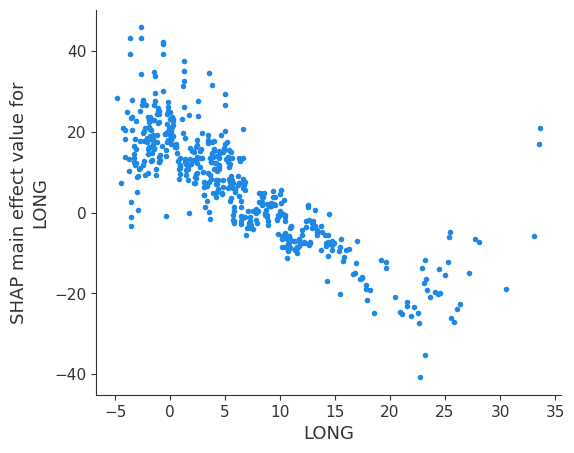

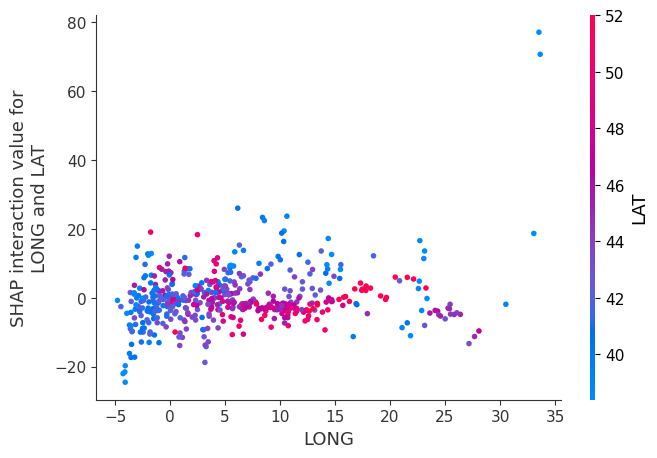

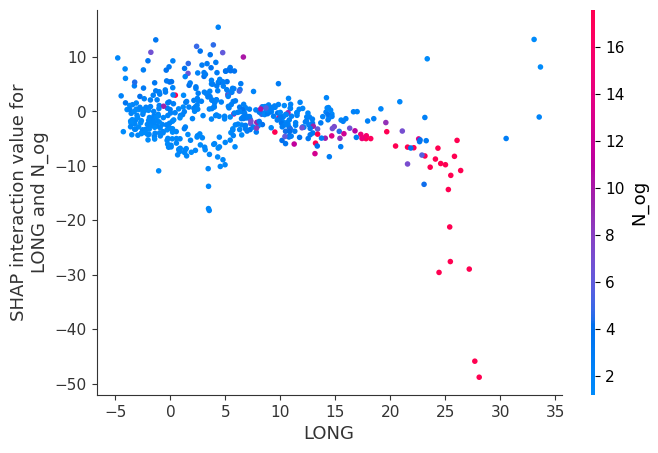

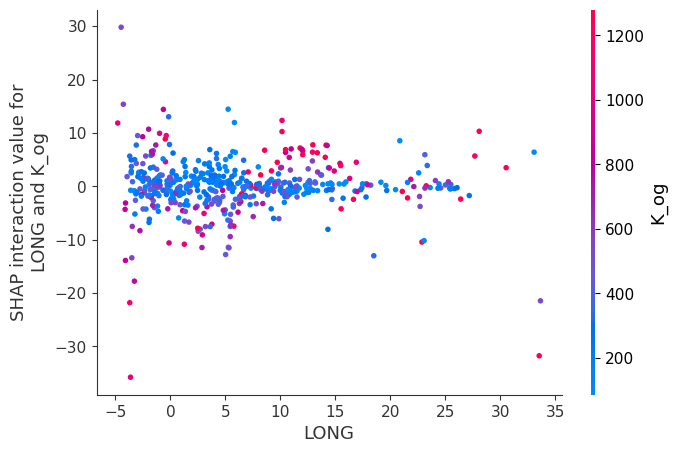

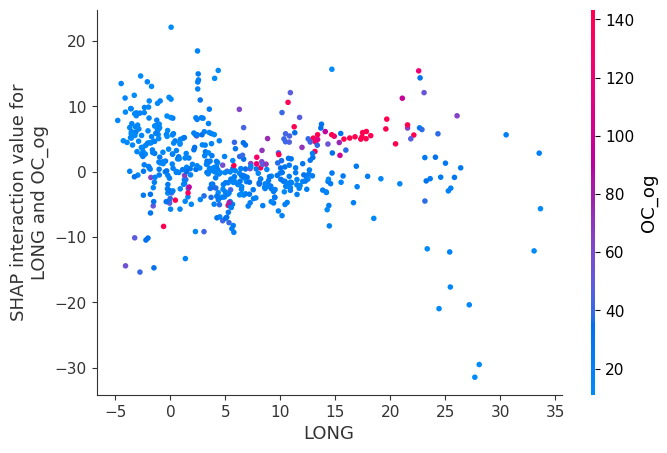

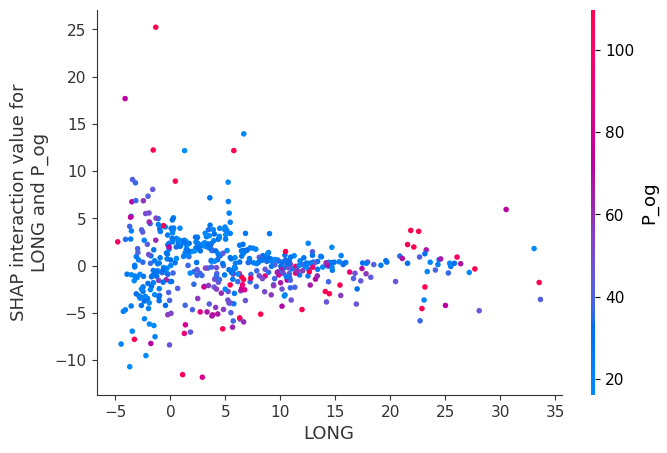

In [13]:
shap.dependence_plot(('LONG', 'LONG'), shap_interaction_values, X_test_summary)


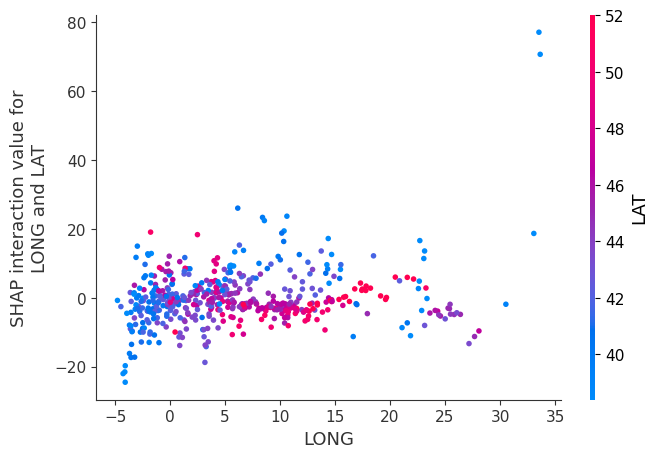

In [26]:
shap.dependence_plot(('LONG', 'LAT'), shap_interaction_values, X_test_summary)
# Hmm Nothing special

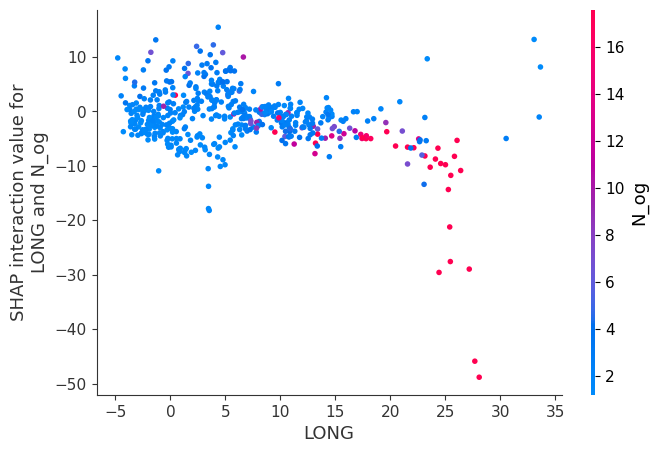

In [27]:
shap.dependence_plot(('LONG', 'N_og'), shap_interaction_values, X_test_summary)
# Red and Blue average round 0 but red pushes prediction down with high N and higher LONG

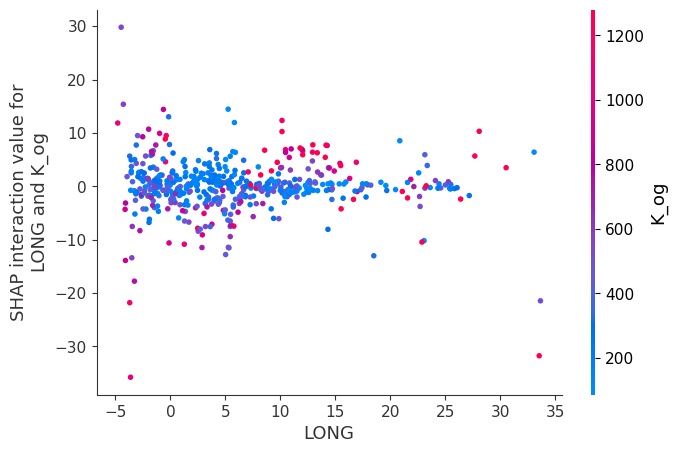

In [28]:
shap.dependence_plot(('LONG', 'K_og'), shap_interaction_values, X_test_summary)
# Don't see any pattern, averages round 0

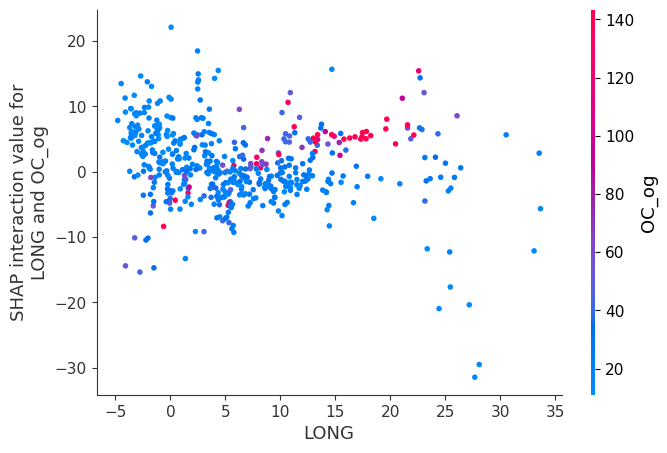

In [29]:
shap.dependence_plot(('LONG', 'OC_og'), shap_interaction_values, X_test_summary)
# Don't see any pattern. More blue (low OC) than red

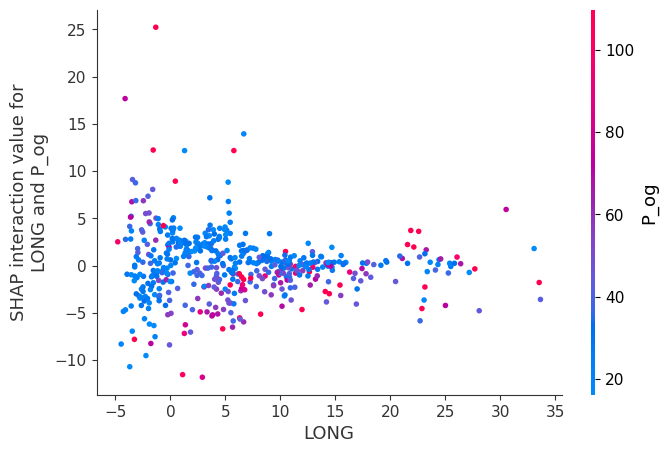

In [31]:
shap.dependence_plot(('LONG', 'P_og'), shap_interaction_values, X_test_summary)
# Don't see pattern.

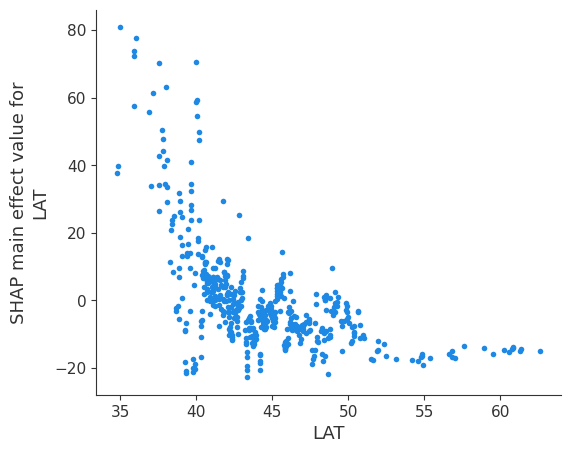

In [32]:
shap.dependence_plot(('LAT', 'LAT'), shap_interaction_values, X_test_summary)
# With higher LAT decreases prediction

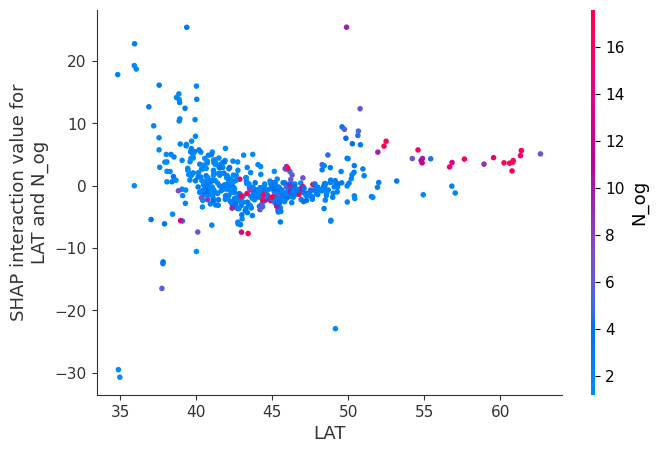

In [33]:
shap.dependence_plot(('LAT', 'N_og'), shap_interaction_values, X_test_summary)
# Don't see pattern.

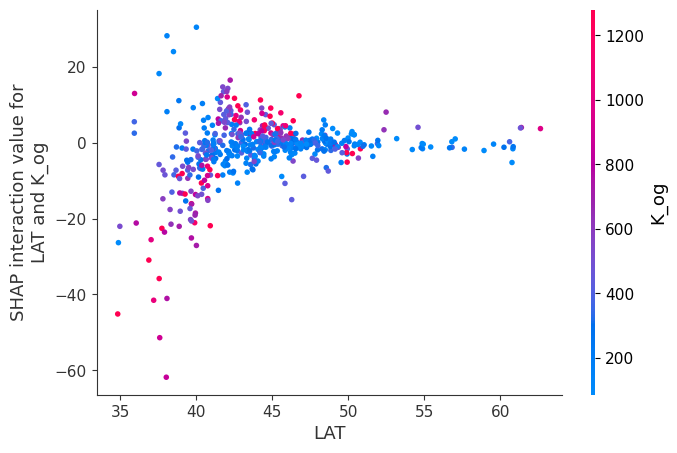

In [34]:
shap.dependence_plot(('LAT', 'K_og'), shap_interaction_values, X_test_summary)
# Blue (low K) averages around 0 regardless of LAT.
# Red (high K) and low LAT decreases prediction.

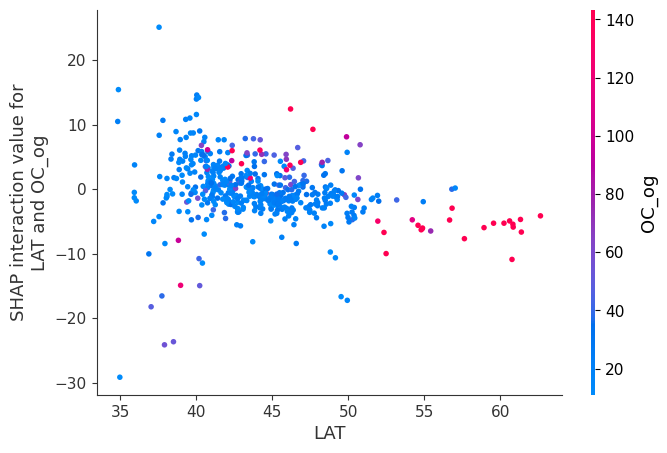

In [35]:
shap.dependence_plot(('LAT', 'OC_og'), shap_interaction_values, X_test_summary)
# Don't see any pattern.

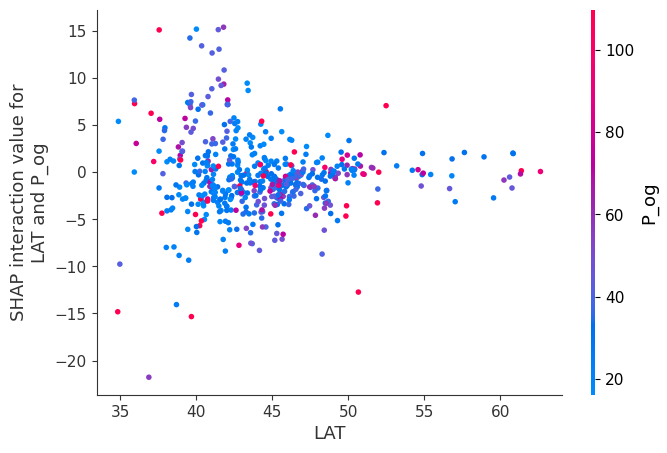

In [36]:
shap.dependence_plot(('LAT', 'P_og'), shap_interaction_values, X_test_summary)
# Don't see pattern.

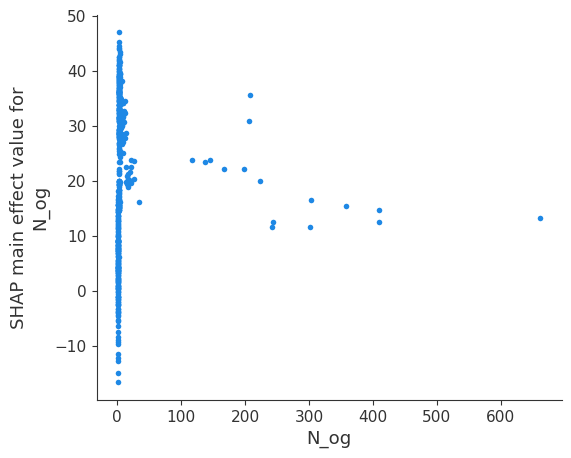

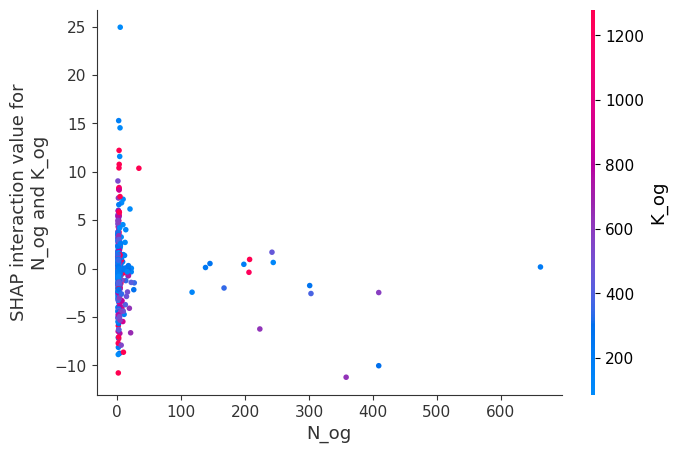

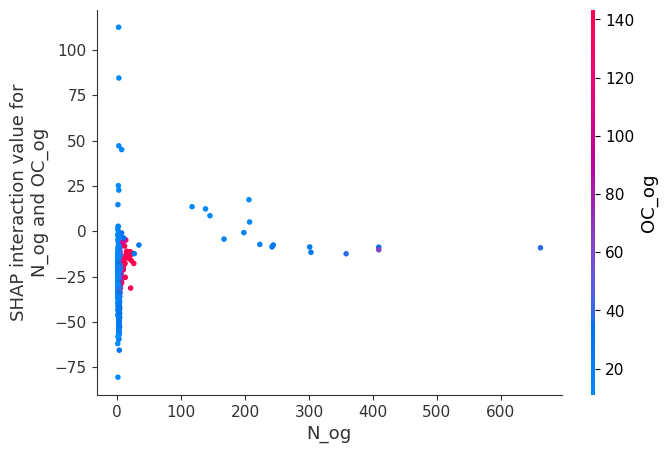

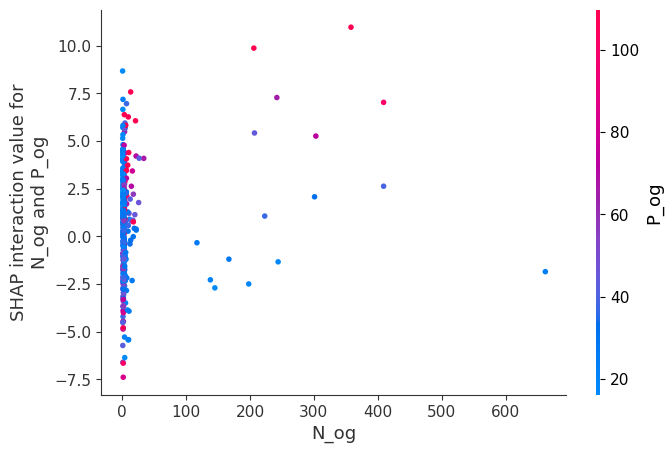

In [15]:
shap.dependence_plot(('N_og', 'N_og'), shap_interaction_values, X_test_summary)
shap.dependence_plot(('N_og', 'K_og'), shap_interaction_values, X_test_summary)
shap.dependence_plot(('N_og', 'OC_og'), shap_interaction_values, X_test_summary)
shap.dependence_plot(('N_og', 'P_og'), shap_interaction_values, X_test_summary)
# N has a bit the problem that many samples have low and some outliers make it difficult to see something here

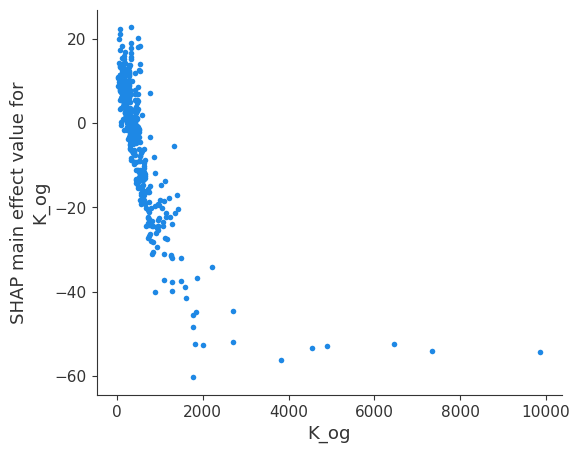

In [37]:
shap.dependence_plot(('K_og', 'K_og'), shap_interaction_values, X_test_summary)
# Low K increases prediction and decreases linear with increasing K value up to 2000 where decreasing effect remains same

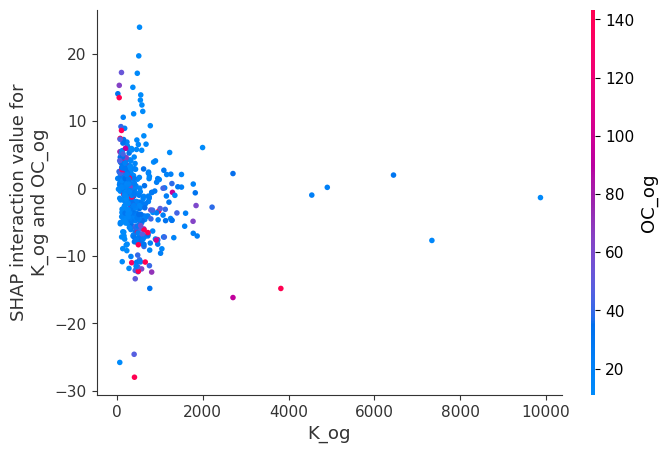

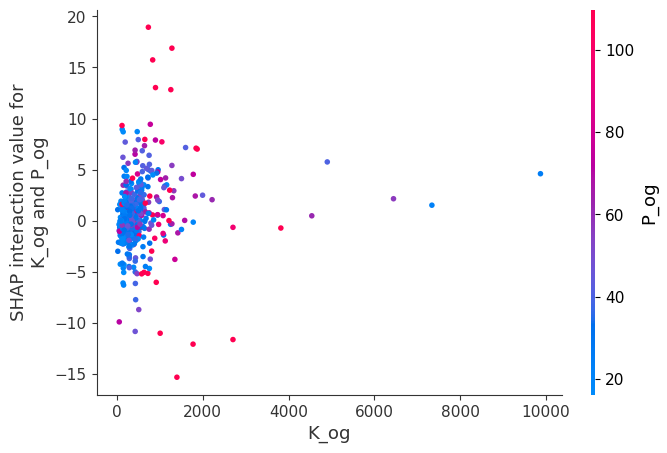

In [38]:
shap.dependence_plot(('K_og', 'OC_og'), shap_interaction_values, X_test_summary)
shap.dependence_plot(('K_og', 'P_og'), shap_interaction_values, X_test_summary)
# Don't see pattern.

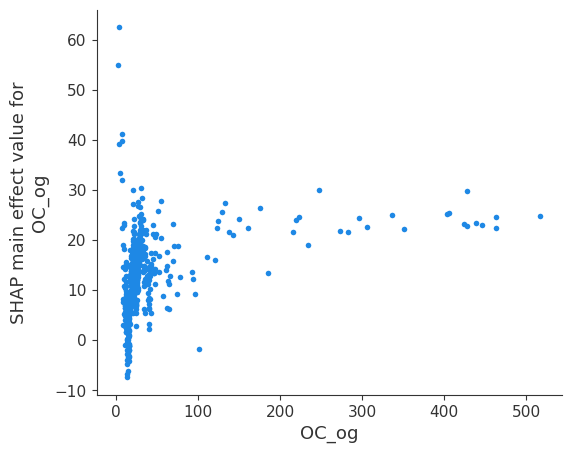

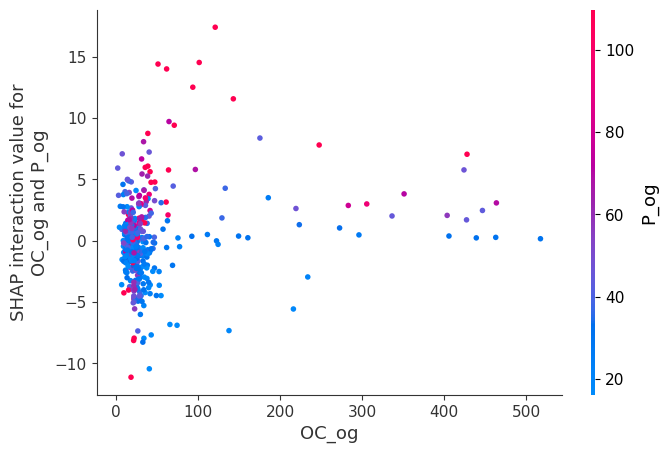

In [39]:
shap.dependence_plot(('OC_og', 'OC_og'), shap_interaction_values, X_test_summary)
shap.dependence_plot(('OC_og', 'P_og'), shap_interaction_values, X_test_summary)
# Don't see pattern.

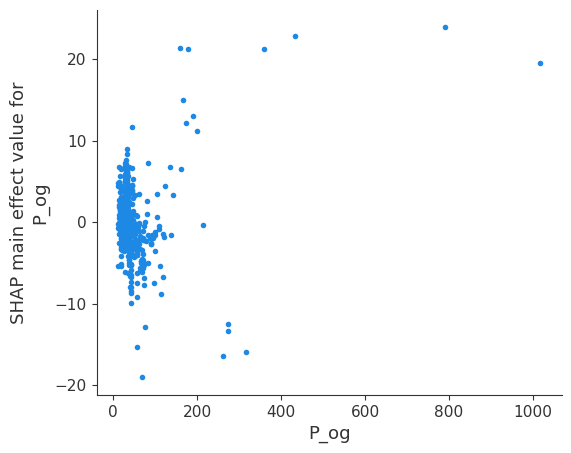

In [40]:
shap.dependence_plot(('P_og', 'P_og'), shap_interaction_values, X_test_summary)
# Don't see pattern.